In [56]:
#importing stuff  + parameters
import numpy as np 
import matplotlib.pyplot as plt

beta = 0.95

In [57]:
#setting up stuff 
#transition matrix 
import matplotlib.pyplot as plt
P = {}
#transition to the next stage depended on the decision + this state
P[0] = [ [0.8, 0.2, 0.0, 0.0],  # light use
         [0.6, 0.4, 0.0, 0.0],
         [0.4, 0.5, 0.1, 0.0],
         [0.2, 0.5, 0.3, 0.0] ]

P[1] = [ [0.5, 0.5, 0.0, 0.0],  # medium use
         [0.2, 0.6, 0.2, 0.0],
         [0.1, 0.4, 0.4, 0.1],
         [0.0, 0.3, 0.4, 0.3] ]

P[2] = [ [0.3, 0.4, 0.2, 0.1],  # full use
         [0.1, 0.4, 0.3, 0.2],
         [0.0, 0.2, 0.4, 0.4],
         [0.0, 0.0, 0.3, 0.7] ]

def utilities(x,d):
    if d == 0:
        return 1.5 - 2*x
    if d == 1:
        return 2.5 - 2*x
    if d == 2:
        return 3.5 - 2*x

def expected_value(x,d,P,V):
    return np.dot(P[d][x],V) #expected utility calculated stochastically 

In [58]:
V = np.zeros(4)

def iteration(V):
    previous = V.copy()
    for i in range(4):
        v0 = np.exp(utilities(i,0)+ beta*expected_value(i,0,P,previous))
        # print(expected_value(i,0,P,previous),v0)
        v1 = np.exp(utilities(i,1)+ beta*expected_value(i,1,P,previous))
        v2 = np.exp(utilities(i,2)+ beta*expected_value(i,2,P,previous))
        V[i] = np.log(v0 + v1 + v2)
    

iteration(V)
print("first iteration",V)
iteration(V)
print("second iteration",V)


first iteration [ 3.90760596  1.90760596 -0.09239404 -2.09239404]
second iteration [ 6.18643192  3.41736065  0.58628088 -2.26524146]


In [59]:
distance = 1
distance_record = []
first, second, third, fourth= [],[],[],[]

while distance > 0.0001:
    first.append(V[0])
    second.append(V[1])
    third.append(V[2])
    fourth.append(V[3])
    last_one = V.copy()
    iteration(V)
    distance = sum(abs(last_one - V))
    distance_record.append(distance)

print("there are",len(distance_record), "iterations executed")


there are 217 iterations executed


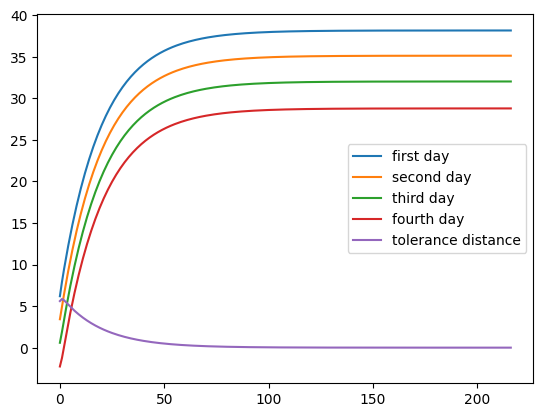

converged point for our value function [38.15289246 35.11837208 32.01782318 28.77675577]


In [60]:
#graphing out the movement of the values to show that it converges 
x = np.arange(len(first))  

plt.plot(x,first, label='first day')
plt.plot(x,second, label='second day')
plt.plot(x,third, label='third day')
plt.plot(x,fourth, label='fourth day')
plt.plot(x,distance_record, label='tolerance distance')
plt.legend()
plt.show()

print("converged point for our value function",V)
#this shows that the value function actually converges 

In [63]:
# now we will arrive at computing likelihood function 

choice_value = [[],[],[]] #first is 0, second is 1 

for i in range(4):
    choice_value[0].append(utilities(i,0) + beta*expected_value(i,0,P,V))
    choice_value[1].append(utilities(i,1) + beta*expected_value(i,1,P,V))
    choice_value[2].append(utilities(i,2) + beta*expected_value(i,2,P,V))

choice_prob = [[],[],[]]

for i in range(4):
    sum_value = choice_value[0][i] + choice_value[1][i] + choice_value[2][i]
    choice_prob[0].append(np.exp(choice_value[0][i]/sum_value))
    choice_prob[1].append(np.exp(choice_value[1][i]/sum_value))
    choice_prob[2].append(np.exp(choice_value[2][i]/sum_value))

# compute likelihood for all-replace versus replace-middle 




[[np.float64(37.16868896328324), np.float64(34.592130090873695), np.float64(31.72101907337936), np.float64(28.555355910800223)], [np.float64(37.30385065466893), np.float64(33.849908055885024), np.float64(30.370070780266925), np.float64(26.8768842455747)], [np.float64(36.535733942846065), np.float64(33.062169376108), np.float64(29.274430696330974), np.float64(25.761622193684595)]] [[np.float64(1.3977000954238687), np.float64(1.406065019085629), np.float64(1.4150828400717566), np.float64(1.4214728154960048)], [np.float64(1.399402946568663), np.float64(1.3958210481056237), np.float64(1.3943130822026637), np.float64(1.3923892162921443)], [np.float64(1.3897532651464517), np.float64(1.3850304937960451), np.float64(1.3776925666723516), np.float64(1.373394399905773)]]
